In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [29]:
dictionary = pd.read_excel("Data Dictionary - carprices.xlsx")
dictionary = dictionary.loc[3:28,['Unnamed: 7','Unnamed: 11']]
dictionary

,Unnamed: 7,Unnamed: 11
3,Car_ID,Unique id of each observation (Interger)
4,Symboling,"Its assigned insurance risk rating, A value of..."
5,carCompany,Name of car company (Categorical)
6,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,aspiration,Aspiration used in a car (Categorical)
8,doornumber,Number of doors in a car (Categorical)
9,carbody,body of car (Categorical)
10,drivewheel,type of drive wheel (Categorical)
11,enginelocation,Location of car engine (Categorical)
12,wheelbase,Weelbase of car (Numeric)


In [39]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### drop useless columns

In [41]:
df.drop(['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)

##### quick eda

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


In [43]:
df.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

* enginesize, curbweight, horsepower are highly related to car price

##### feature engineering

##### 1. missing data

In [45]:
df.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* no missing data(if it have missing values then have to fill, drop or fix the data)

##### 2. outlier

<AxesSubplot:xlabel='enginesize', ylabel='price'>

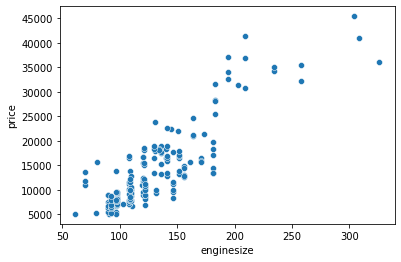

In [48]:
sns.scatterplot(data=df, x='enginesize', y='price')

<AxesSubplot:xlabel='curbweight', ylabel='price'>

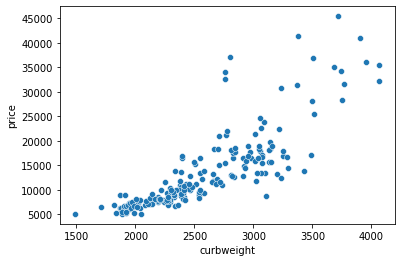

In [50]:
sns.scatterplot(data=df, x='curbweight', y='price')

In [54]:
df_drop_idx = df[(df['price']>30000) & (df['curbweight']<3000)].index
df.drop(df_drop_idx, axis=0)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:xlabel='horsepower', ylabel='price'>

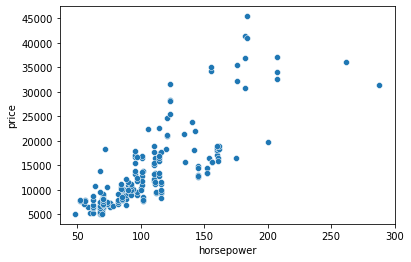

In [52]:
sns.scatterplot(data=df, x='horsepower', y='price')

In [55]:
df_drop_idx = df[(df['price']>40000) & (df['horsepower']<200)].index
df.drop(df_drop_idx, axis=0)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


##### 3. categorical data processing

In [56]:
df_str_cols = df.select_dtypes(include = 'object')
df_num_cols = df.select_dtypes(exclude = 'object')

In [57]:
# make str columns to numerical columns
df_str_dummies = pd.get_dummies(df_str_cols, drop_first=True)
df_str_dummies

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
final_df = pd.concat([df_num_cols, df_str_dummies], axis=1)
final_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [67]:
#final_df.info()

In [59]:
final_df.corr()['price'].sort_values()

cylindernumber_four     -0.697762
highwaympg              -0.697599
citympg                 -0.685751
drivewheel_fwd          -0.601950
fuelsystem_2bbl         -0.501374
enginetype_ohc          -0.344270
carbody_hatchback       -0.262039
fueltype_gas            -0.105679
peakrpm                 -0.085267
cylindernumber_three    -0.071388
fuelsystem_spdi         -0.061475
carbody_wagon           -0.042310
doornumber_two          -0.031835
fuelsystem_spfi         -0.019580
fuelsystem_4bbl         -0.017306
enginetype_rotor        -0.004544
cylindernumber_two      -0.004544
fuelsystem_mfi          -0.002747
enginetype_ohcf          0.016285
enginetype_l             0.042267
compressionratio         0.067984
stroke                   0.079443
fuelsystem_idi           0.105679
carheight                0.119336
carbody_sedan            0.125716
enginetype_dohcv         0.159225
aspiration_turbo         0.177926
cylindernumber_twelve    0.199634
carbody_hardtop          0.225854
cylindernumber

* still enginesize, curbweight, horsepower are top 3 correlated columns

##### train/test split

In [60]:
from sklearn.model_selection import train_test_split

In [69]:
X = final_df.drop('price', axis=1)
y= final_df['price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

##### scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#####  grid search, fit model

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [74]:
base_elastic_net_model = ElasticNet()

In [85]:
param_grid = {'alpha':[0.1,0.01, .05, .001], 
             'l1_ratio':[.65, .66, .67]}

In [86]:
grid_model = GridSearchCV(estimator= base_elastic_net_model,
                          param_grid = param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5, verbose=0)

In [87]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.01, 0.05, 0.001],
                         'l1_ratio': [0.65, 0.66, 0.67]},
             scoring='neg_mean_squared_error')

In [88]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.65}

In [89]:
y_pred = grid_model.predict(X_test)

##### estimate mae, rmse, r2_score

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
mae = mean_absolute_error(y_test, y_pred)
mae

1942.632397576424

In [92]:
final_df['price'].mean()

13276.710570731706

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3118.715385824214

In [98]:
from sklearn.metrics import r2_score

In [105]:
r2 = r2_score(y_test, y_pred)
r2

0.8629504045869683

In [109]:
report = pd.DataFrame(data=[r2],columns=['R-SQUARED'])
report['RMSE']=rmse
report['MAE']=mae
report.index=['grid_model']
report

,R-SQUARED,RMSE,MAE
grid_model,0.86295,3118.715386,1942.632398
